<a href="https://colab.research.google.com/github/daniel-neves-dev/dio_matrix_confusion/blob/main/matrix_confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8813 - loss: 0.3646 - val_accuracy: 0.9847 - val_loss: 0.0484
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9848 - loss: 0.0488 - val_accuracy: 0.9883 - val_loss: 0.0352
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9909 - loss: 0.0300 - val_accuracy: 0.9905 - val_loss: 0.0284
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9920 - val_loss: 0.0263
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 0.9931 - val_loss: 0.0254
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


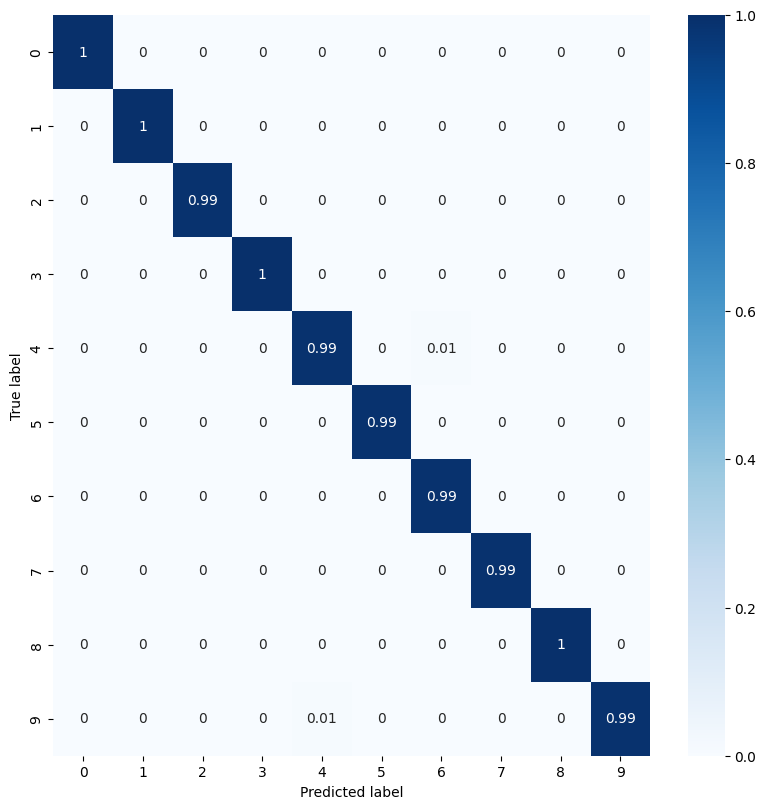


Sensitivity (Recall): [0.99591837 0.99647577 0.99224806 0.9960396  0.99287169 0.99103139
 0.98956159 0.99319066 0.99589322 0.98711596]

Specificity: [0.99933481 0.99954879 0.99944246 0.99888765 0.99922377 0.99923144
 0.99922583 0.99899688 0.99933525 0.99911022]

Accuracy: 0.9986200000000001

Precision: [0.99389002 0.99647577 0.99514091 0.99015748 0.99287169 0.99214366
 0.99267016 0.99126214 0.99385246 0.99203187]

F-Score: [0.99490316 0.99647577 0.99369238 0.99308983 0.99287169 0.99158721
 0.99111343 0.99222546 0.99487179 0.98956781]


In [2]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Input

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

logdir = "logs"

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape the images to include a channel dimension
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize the images to be in the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class labels
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

model = models.Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

# Generate true labels and model predictions
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Compute confusion matrix
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

# Normalize confusion matrix
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

# Convert confusion matrix to DataFrame for visualization
con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

# Plot the confusion matrix using seaborn heatmap
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

def calculate_metrics(confusion_matrix):
    """Extract values from the confusion matrix"""

    TP = np.diag(confusion_matrix)  # True Positives (diagonal values)
    FP = confusion_matrix.sum(axis=0) - TP  # False Positives (column sum minus TP)
    FN = confusion_matrix.sum(axis=1) - TP  # False Negatives (row sum minus TP)
    TN = confusion_matrix.sum() - (FP + FN + TP)  # True Negatives (total - FP - FN - TP)

    sensitivity = TP / (TP + FN)

    specificity = TN / (FP + TN)

    precision = TP / (TP + FP)

    accuracy = (TP + TN) / confusion_matrix.sum()

    f_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    # Handle cases where division by zero may occur
    sensitivity = np.nan_to_num(sensitivity)
    specificity = np.nan_to_num(specificity)
    precision = np.nan_to_num(precision)
    f_score = np.nan_to_num(f_score)

    return sensitivity, specificity, accuracy, precision, f_score


sensitivity, specificity, accuracy, precision, f_score = calculate_metrics(con_mat)

print("\nSensitivity (Recall):", sensitivity)
print("\nSpecificity:", specificity)
print("\nAccuracy:", accuracy.mean())
print("\nPrecision:", precision)
print("\nF-Score:", f_score)
